In [210]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

df=pd.read_csv('/kaggle/input/us-tornado-dataset-1950-2021/us_tornado_dataset_1950_2021.csv')

/kaggle/input/us-tornado-dataset-1950-2021/us_tornado_dataset_1950_2021.csv


In [211]:
df.st.unique()

array(['IL', 'MO', 'OH', 'AR', 'TX', 'LA', 'MS', 'TN', 'OK', 'FL', 'AL',
       'SC', 'KS', 'IA', 'NE', 'SD', 'WY', 'NC', 'GA', 'ND', 'MN', 'WI',
       'IN', 'PA', 'NM', 'CT', 'CO', 'WV', 'MD', 'KY', 'CA', 'VA', 'NJ',
       'MI', 'MA', 'NH', 'OR', 'NY', 'MT', 'AZ', 'UT', 'ME', 'VT', 'ID',
       'WA', 'DE', 'HI', 'PR', 'AK', 'NV', 'RI', 'DC', 'VI'], dtype=object)

In [212]:
df[df['yr']==1950]

,yr,mo,dy,date,st,mag,inj,fat,slat,slon,elat,elon,len,wid
0,1950,1,3,1950-01-03,IL,3,3,0,39.10,-89.30,39.12,-89.23,3.6,130
1,1950,1,3,1950-01-03,MO,3,3,0,38.77,-90.22,38.83,-90.03,9.5,150
2,1950,1,3,1950-01-03,OH,1,1,0,40.88,-84.58,0.00,0.00,0.1,10
3,1950,1,13,1950-01-13,AR,3,1,1,34.40,-94.37,0.00,0.00,0.6,17
4,1950,1,25,1950-01-25,IL,2,0,0,41.17,-87.33,0.00,0.00,0.1,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,1950,11,20,1950-11-20,MS,1,3,0,32.42,-89.13,0.00,0.00,2.0,37
197,1950,12,2,1950-12-02,AR,3,0,0,36.12,-91.83,36.18,-91.72,7.8,10
198,1950,12,2,1950-12-02,IL,1,0,0,38.17,-89.78,38.22,-89.62,9.6,50
199,1950,12,2,1950-12-02,IL,2,3,1,38.97,-90.05,39.07,-89.72,18.8,50


In [213]:
import seaborn as sns

In [214]:
df[df['st']=='TX']['slon'].mean()

-98.51295329544213

In [215]:
df[df['st']=='TX']['slat'].mean()

32.06764168761614

In [216]:
import folium
m = folium.Map(location = [32.06, -98.5], tiles ='OpenStreetMap',      
    zoom_start=5.3)

for index, location_info in df[(df['st']=='TX') & (df['yr']>=2020) & (df['mag']>=2)].iterrows():
    folium.Marker([location_info["slat"], location_info["slon"]], popup=location_info["date"],icon=folium.Icon(color='red')).add_to(m)
    folium.Marker([location_info["elat"], location_info["elon"]], popup=location_info["date"],icon=folium.Icon(color='green')).add_to(m)
    

In [217]:
m

In [218]:
df[df['st']=='IL']['slat'].mean()

40.087062938105895

In [219]:
df[df['st']=='IL']['slon'].mean()

-89.18437046979865

In [220]:
m = folium.Map(location = [40.06, -89.5], tiles ='OpenStreetMap',      
    zoom_start=6.3)

for index, location_info in df[(df['st']=='IL') & (df['yr']>=2020) & (df['mag']>=2)].iterrows():
    folium.Marker([location_info["slat"], location_info["slon"]], popup=location_info["date"],icon=folium.Icon(color='red')).add_to(m)
    folium.Marker([location_info["elat"], location_info["elon"]], popup=location_info["date"],icon=folium.Icon(color='green')).add_to(m)

In [221]:
m

In [222]:
df[df['mag']>3]['slat'].mean()

37.919401718749995

In [223]:
df[df['mag']>3]['slon'].mean()

-91.72353875

In [224]:
m = folium.Map(location = [37.9, -91.7], tiles ='OpenStreetMap',      
    zoom_start=4.8)

for index, location_info in df[(df['yr']>=2020) & (df['mag']>3)].iterrows():
    folium.Marker([location_info["slat"], location_info["slon"]], popup=location_info["date"],icon=folium.Icon(color='red')).add_to(m)
    folium.Marker([location_info["elat"], location_info["elon"]], popup=location_info["date"],icon=folium.Icon(color='green')).add_to(m)

In [225]:
m

In [226]:
df[df['fat']>=40]['slat'].mean()

35.67281428571429

In [227]:
df[df['fat']>=40]['slon'].mean()

-90.64436428571427

In [228]:
m = folium.Map(location = [35.7, -90.6], tiles ='OpenStreetMap',      
    zoom_start=4)

for index, location_info in df[df['fat']>=40].iterrows():
    folium.Marker([location_info["slat"], location_info["slon"]], popup=location_info["date"],icon=folium.Icon(color='red')).add_to(m)
    folium.Marker([location_info["elat"], location_info["elon"]], popup=location_info["date"],icon=folium.Icon(color='green')).add_to(m)

In [229]:
m

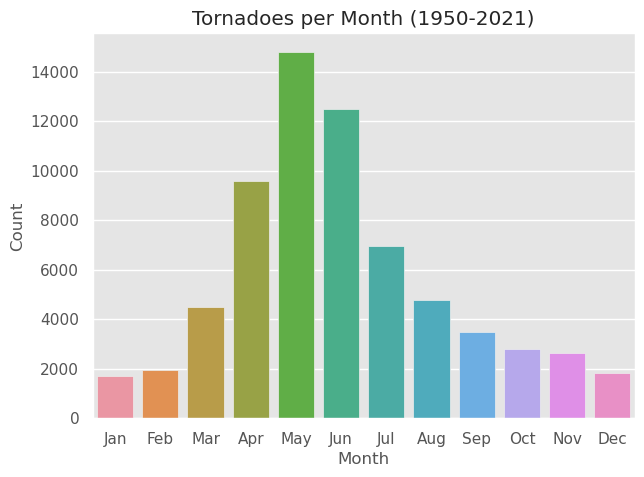

In [230]:
import matplotlib.pyplot as plt
count_vec=[]
month_vec=[]
for month in range(1,13):
    foo = len(df[df.mo==month])
    count_vec.append(foo)
    month_vec.append(month)
df_month = pd.DataFrame({"Month":month_vec,"Count":count_vec})    

fig,ax = plt.subplots(figsize=(7,5))
sns.barplot(df_month,x="Month",y="Count")
ax.set(title="Tornadoes per Month (1950-2021)")
labels = ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]
ax.set_xticklabels(labels)
plt.show()

# **The most tornado prone month is May. This is because the ingredients for powerful storms and large twisters come together frequently.**

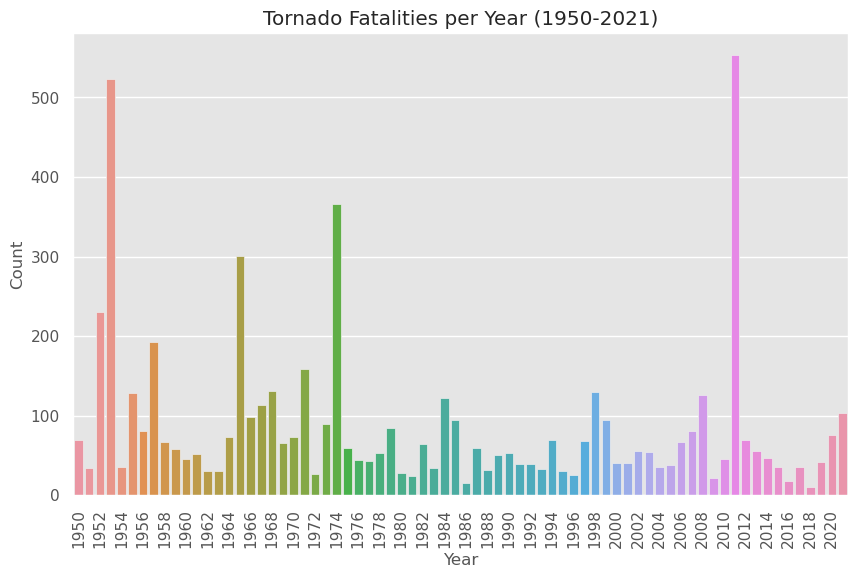

In [248]:
fat_vec=[]
yr_vec=[]
for yr in range(1950,2022):
    totfat = df[df.yr==yr].fat.sum()
    fat_vec.append(totfat)
    yr_vec.append(yr)
df_fat = pd.DataFrame({"yr":yr_vec,"fat":fat_vec})    

#fig,ax = plt.subplots(figsize=(15,5))
fig,ax = plt.subplots(figsize=(10,6))
sns.barplot(data=df_fat,x="yr",y="fat")
ax.tick_params(axis='x', rotation=90)
ax.set(xlabel="Year",ylabel="Count",title="Tornado Fatalities per Year (1950-2021)")
#ax.ticklabel_format(useOffset=False, style='plain')

# Only show every other tick label
n=2
for index, label in enumerate(ax.xaxis.get_ticklabels()):
    if index % n != 0:
        label.set_visible(False)
plt.show()

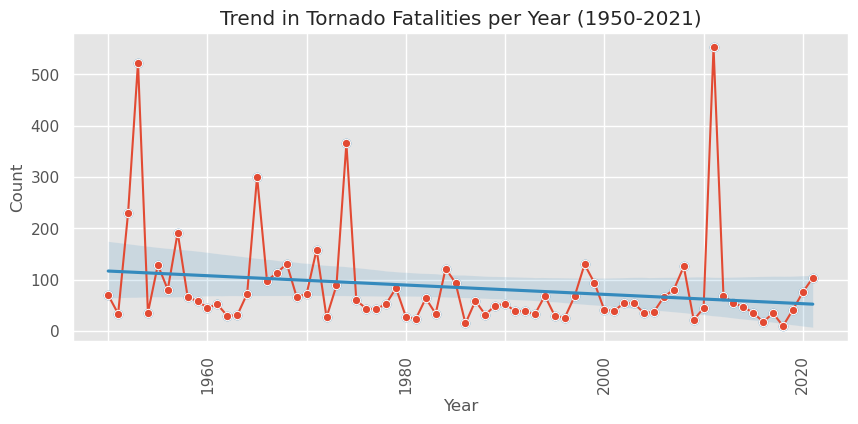

In [249]:
fig,ax = plt.subplots(figsize=(10,4))
sns.lineplot(data=df_fat,x="yr",y="fat",marker="o")
sns.regplot(data=df_fat,x="yr",y="fat",marker="o",ci=95)
ax.tick_params(axis='x', rotation=90)
ax.set(xlabel="Year",ylabel="Count",title="Trend in Tornado Fatalities per Year (1950-2021)")
#ax.ticklabel_format(useOffset=False, style='plain')

# Only show every other tick label
n=2
for index, label in enumerate(ax.xaxis.get_ticklabels()):
    if index % n != 0:
        label.set_visible(False)
plt.show()

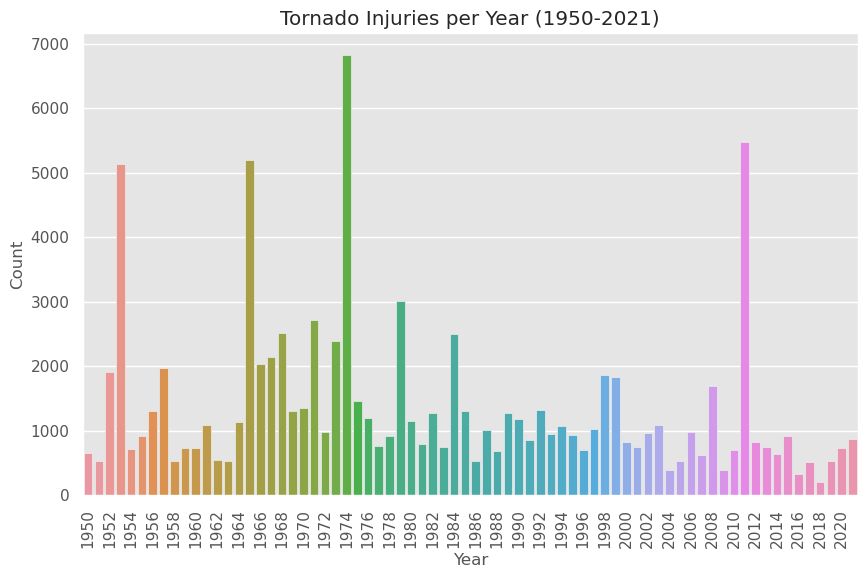

In [250]:
inj_vec=[]
yr_vec=[]
for yr in range(1950,2022):
    totinj = df[df.yr==yr].inj.sum()
    inj_vec.append(totinj)
    yr_vec.append(yr)
df_inj = pd.DataFrame({"yr":yr_vec,"inj":inj_vec})    

#fig,ax = plt.subplots(figsize=(15,5))
fig,ax = plt.subplots(figsize=(10,6))
sns.barplot(data=df_inj,x="yr",y="inj")
ax.tick_params(axis='x', rotation=90)
ax.set(xlabel="Year",ylabel="Count",title="Tornado Injuries per Year (1950-2021)")
#ax.ticklabel_format(useOffset=False, style='plain')

# Only show every other tick label
n=2
for index, label in enumerate(ax.xaxis.get_ticklabels()):
    if index % n != 0:
        label.set_visible(False)
plt.show()

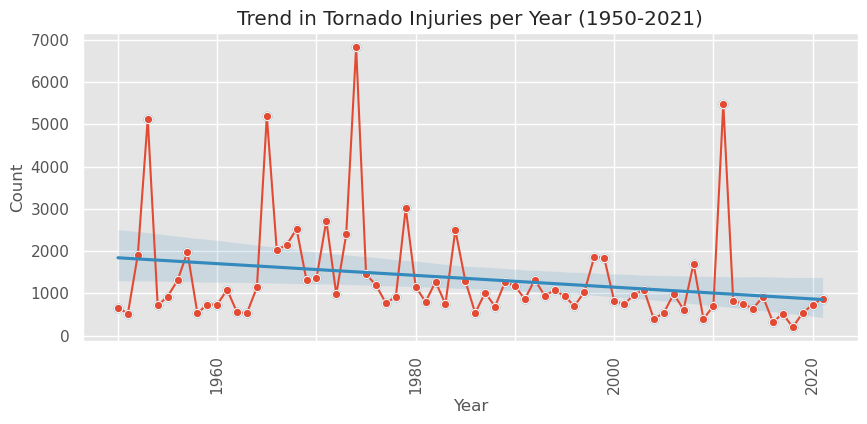

In [252]:
fig,ax = plt.subplots(figsize=(10,4))
sns.lineplot(data=df_inj,x="yr",y="inj",marker="o")
sns.regplot(data=df_inj,x="yr",y="inj",marker="o",ci=95)
ax.tick_params(axis='x', rotation=90)
ax.set(xlabel="Year",ylabel="Count",title="Trend in Tornado Injuries per Year (1950-2021)")
#ax.ticklabel_format(useOffset=False, style='plain')

# Only show every other tick label
n=2
for index, label in enumerate(ax.xaxis.get_ticklabels()):
    if index % n != 0:
        label.set_visible(False)
plt.show()

# **The total number of injuries and fatalities have reduced overall due to tornadoes. This can be attributed to the fact that an improved understanding of tornadoes, along with technology to issue warnings, led to a decline in the number of fatalities**

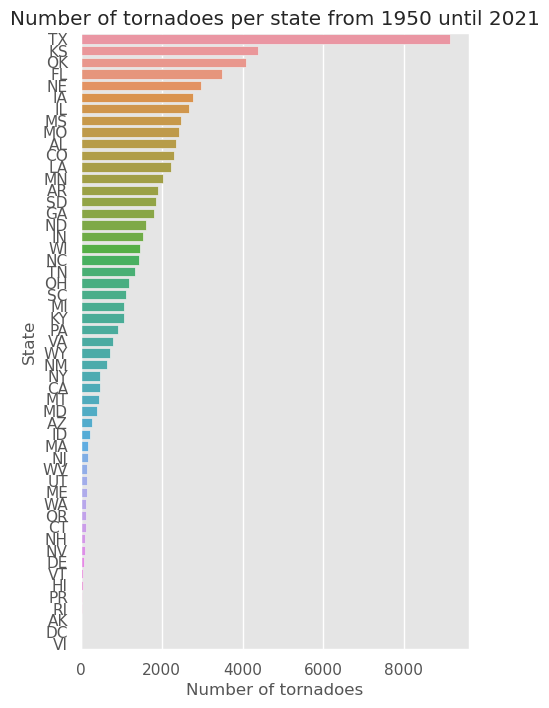

In [233]:
fig,ax = plt.subplots(figsize=(5,8))
sns.countplot(y=df.st,order=df.st.value_counts().index,width=.8)
ax.set(ylabel="State",xlabel="Number of tornadoes")
ax.set_title("Number of tornadoes per state from 1950 until 2021")
plt.show()

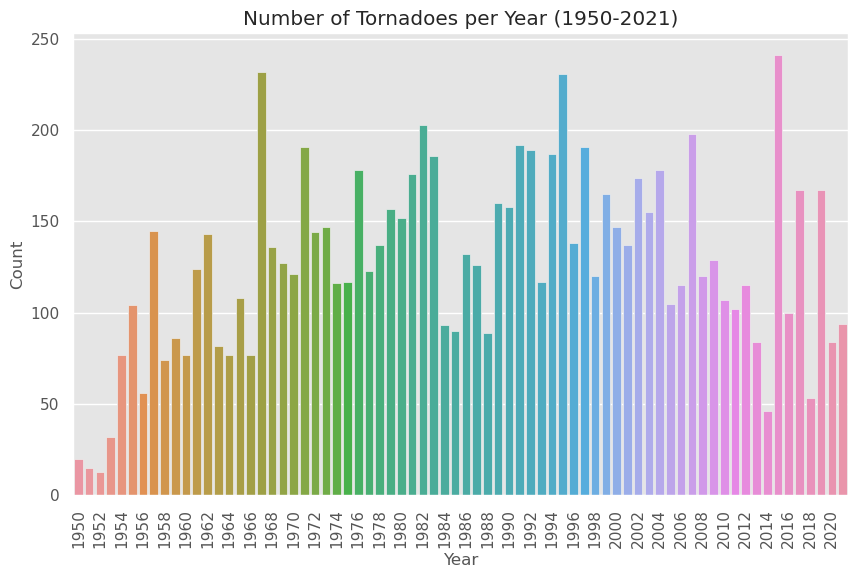

In [243]:
fat_vec=[]
yr_vec=[]
for yr in range(1950,2022):
    totfat = df[(df.yr==yr)].shape[0]
    fat_vec.append(totfat)
    yr_vec.append(yr)
df_yr = pd.DataFrame({"yr":yr_vec,"fat":fat_vec})    

#fig,ax = plt.subplots(figsize=(15,5))
fig,ax = plt.subplots(figsize=(10,6))
sns.barplot(data=df_fat,x="yr",y="fat")
ax.tick_params(axis='x', rotation=90)
ax.set(xlabel="Year",ylabel="Count",title="Number of Tornadoes per Year (1950-2021)")
#ax.ticklabel_format(useOffset=False, style='plain')

# Only show every other tick label
n=2
for index, label in enumerate(ax.xaxis.get_ticklabels()):
    if index % n != 0:
        label.set_visible(False)
plt.show()

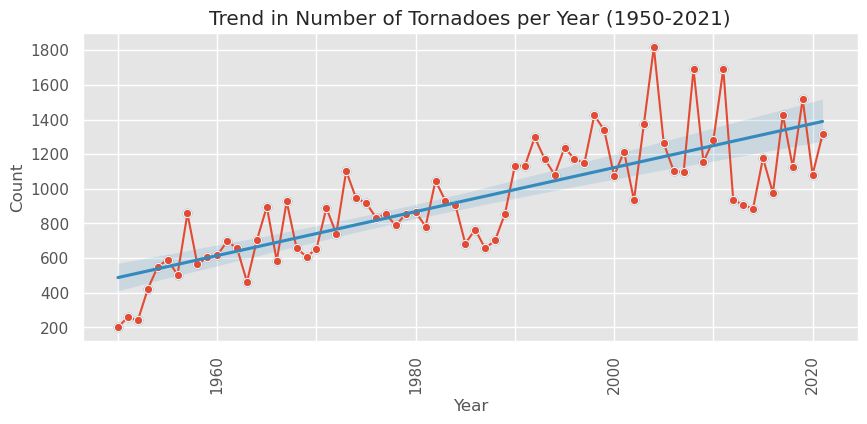

In [246]:
fig,ax = plt.subplots(figsize=(10,4))
sns.lineplot(data=df_yr,x="yr",y="fat",marker="o")
sns.regplot(data=df_yr,x="yr",y="fat",marker="o",ci=95)
ax.tick_params(axis='x', rotation=90)
ax.set(xlabel="Year",ylabel="Count",title="Trend in Number of Tornadoes per Year (1950-2021)")
#ax.ticklabel_format(useOffset=False, style='plain')

# Only show every other tick label
n=2
for index, label in enumerate(ax.xaxis.get_ticklabels()):
    if index % n != 0:
        label.set_visible(False)
plt.show()

# **The number of tornadoes occurring per year seems to increase which can be attributed to Global Warming as it greenhouse emissions have steadily increased since the 1950s**

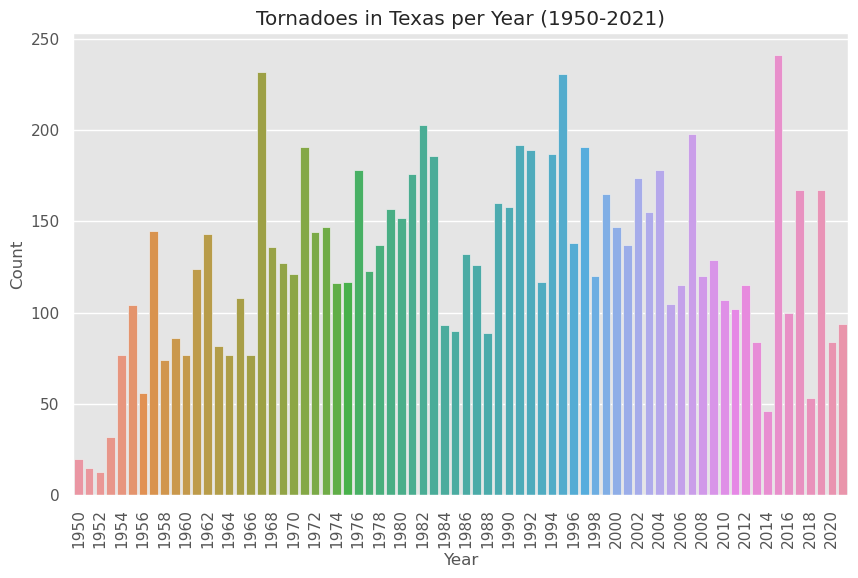

In [242]:
fat_vec=[]
yr_vec=[]
for yr in range(1950,2022):
    totfat = df[(df.yr==yr) & (df.st=='TX')].shape[0]
    fat_vec.append(totfat)
    yr_vec.append(yr)
df_fat = pd.DataFrame({"yr":yr_vec,"fat":fat_vec})    

#fig,ax = plt.subplots(figsize=(15,5))
fig,ax = plt.subplots(figsize=(10,6))
sns.barplot(data=df_fat,x="yr",y="fat")
ax.tick_params(axis='x', rotation=90)
ax.set(xlabel="Year",ylabel="Count",title="Tornadoes in Texas per Year (1950-2021)")
#ax.ticklabel_format(useOffset=False, style='plain')

# Only show every other tick label
n=2
for index, label in enumerate(ax.xaxis.get_ticklabels()):
    if index % n != 0:
        label.set_visible(False)
plt.show()

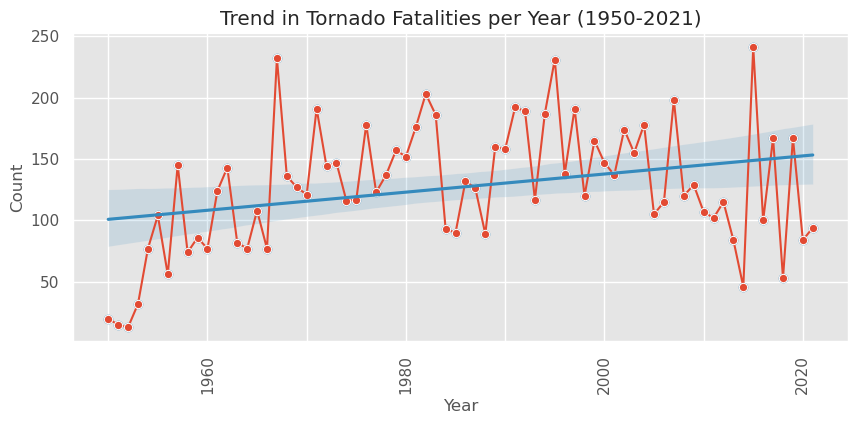

In [247]:
fig,ax = plt.subplots(figsize=(10,4))
sns.lineplot(data=df_fat,x="yr",y="fat",marker="o")
sns.regplot(data=df_fat,x="yr",y="fat",marker="o",ci=95)
ax.tick_params(axis='x', rotation=90)
ax.set(xlabel="Year",ylabel="Count",title="Trend in Tornado Fatalities per Year (1950-2021)")
#ax.ticklabel_format(useOffset=False, style='plain')

# Only show every other tick label
n=2
for index, label in enumerate(ax.xaxis.get_ticklabels()):
    if index % n != 0:
        label.set_visible(False)
plt.show()

# **Texas had an Average of 1 tornado forming every 3 days since the last 70  Years !!**

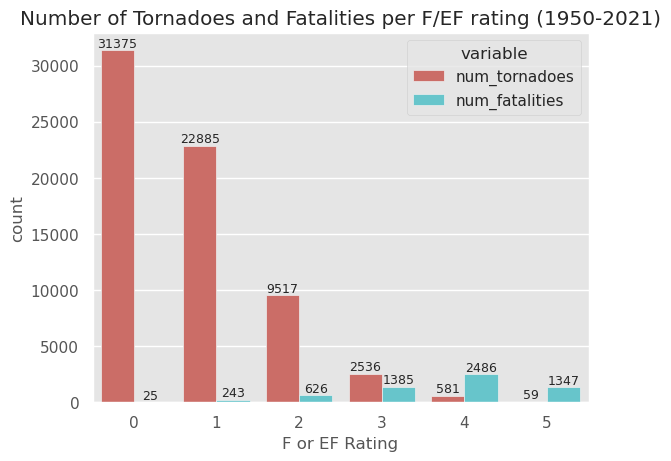

In [235]:
# Count the number of tornadoes and fatalities per F/EF rating. Ignore -9 since no fatalities from that.
f_list = [0,1,2,3,4,5]
fat_count = []
tornado_count = []
for f in f_list:
    count = df[df.mag==f].fat.sum()
    fat_count.append(count)
    count = len(df[df.mag==f])
    tornado_count.append(count)
    
# Convert f_list to string type since categories
f_list = list(map(str,f_list))

# Put these counts in a new dataframe
df_tor_fat = pd.DataFrame({"mag":f_list,"num_tornadoes":tornado_count,"num_fatalities":fat_count},index=None)

# Make a long format version to make easier to plot bars side by side
df_tor_fat_long = pd.melt(df_tor_fat, id_vars="mag", value_vars=['num_tornadoes', 'num_fatalities', ],value_name="count")

#plt.style.use("default")

# Plot number of tornadoes and fatalities per F rating
fig,ax = plt.subplots()
ax=sns.barplot(data=df_tor_fat_long,x="mag",y="count",hue="variable",palette="hls")

#Put numbers on top of bars
for i in ax.containers:
    ax.bar_label(i, fontsize=9)
    

plt.xlabel("F or EF Rating")
plt.title("Number of Tornadoes and Fatalities per F/EF rating (1950-2021)")
plt.show()

# **The number of tornadoes decrease with magnitude. The number of fatalities increase with magnitude.**

In [236]:
df_tor_fat["avg_fatalities"] = df_tor_fat.num_fatalities/df_tor_fat.num_tornadoes
df_tor_fat

,mag,num_tornadoes,num_fatalities,avg_fatalities
0,0,31375,25,0.000797
1,1,22885,243,0.010618
2,2,9517,626,0.065777
3,3,2536,1385,0.546136
4,4,581,2486,4.278830
5,5,59,1347,22.830508


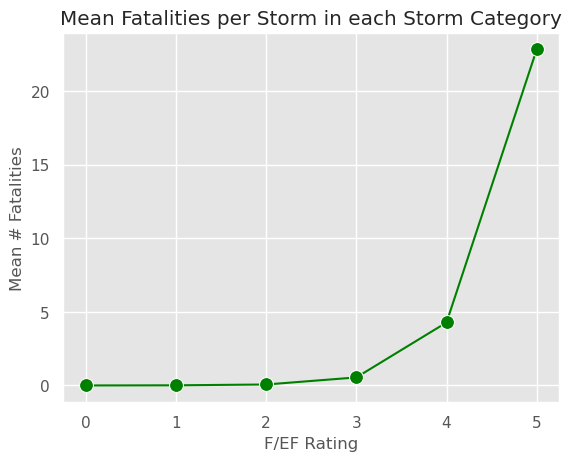

In [237]:
plt.style.use("ggplot")
sns.lineplot(data=df_tor_fat, x="mag", y="avg_fatalities", marker="o",markersize=10,color="green")
plt.xlabel("F/EF Rating")
plt.ylabel("Mean # Fatalities")
plt.title("Mean Fatalities per Storm in each Storm Category")
plt.show()

In [239]:
# Count number of tornadoes per year per category, and all together
year, count_all, count_f0, count_f1, count_f2, count_f3, count_f4, count_f5 = [],[],[],[],[],[],[],[]
for yr in range(1950,2021+1):
    year.append(yr)
    count_all.append(len(df[(df.yr==yr) & (df.mag!=-9)])) # Don't include the unknowns
    count_f0.append(len(df[(df.yr==yr) & (df.mag==0)]))
    count_f1.append(len(df[(df.yr==yr) & (df.mag==1)]))
    count_f2.append(len(df[(df.yr==yr) & (df.mag==2)]))
    count_f3.append(len(df[(df.yr==yr) & (df.mag==3)]))
    count_f4.append(len(df[(df.yr==yr) & (df.mag==4)]))
    count_f5.append(len(df[(df.yr==yr) & (df.mag==5)]))
  
df_counts = pd.DataFrame({"yr":year,"all":count_all,"f0":count_f0,"f1":count_f1,"f2":count_f2,"f3":count_f3,"f4":count_f4,"f5":count_f5})
df_counts

,yr,all,f0,f1,f2,f3,f4,f5
0,1950,201,16,86,68,24,7,0
1,1951,260,49,100,83,23,5,0
2,1952,240,32,82,72,36,18,0
3,1953,421,66,159,134,40,17,5
4,1954,550,89,226,189,39,7,0
...,...,...,...,...,...,...,...,...
67,2017,1364,630,590,129,13,2,0
68,2018,1109,618,401,78,12,0,0
69,2019,1331,647,531,117,33,3,0
70,2020,977,460,405,88,18,6,0


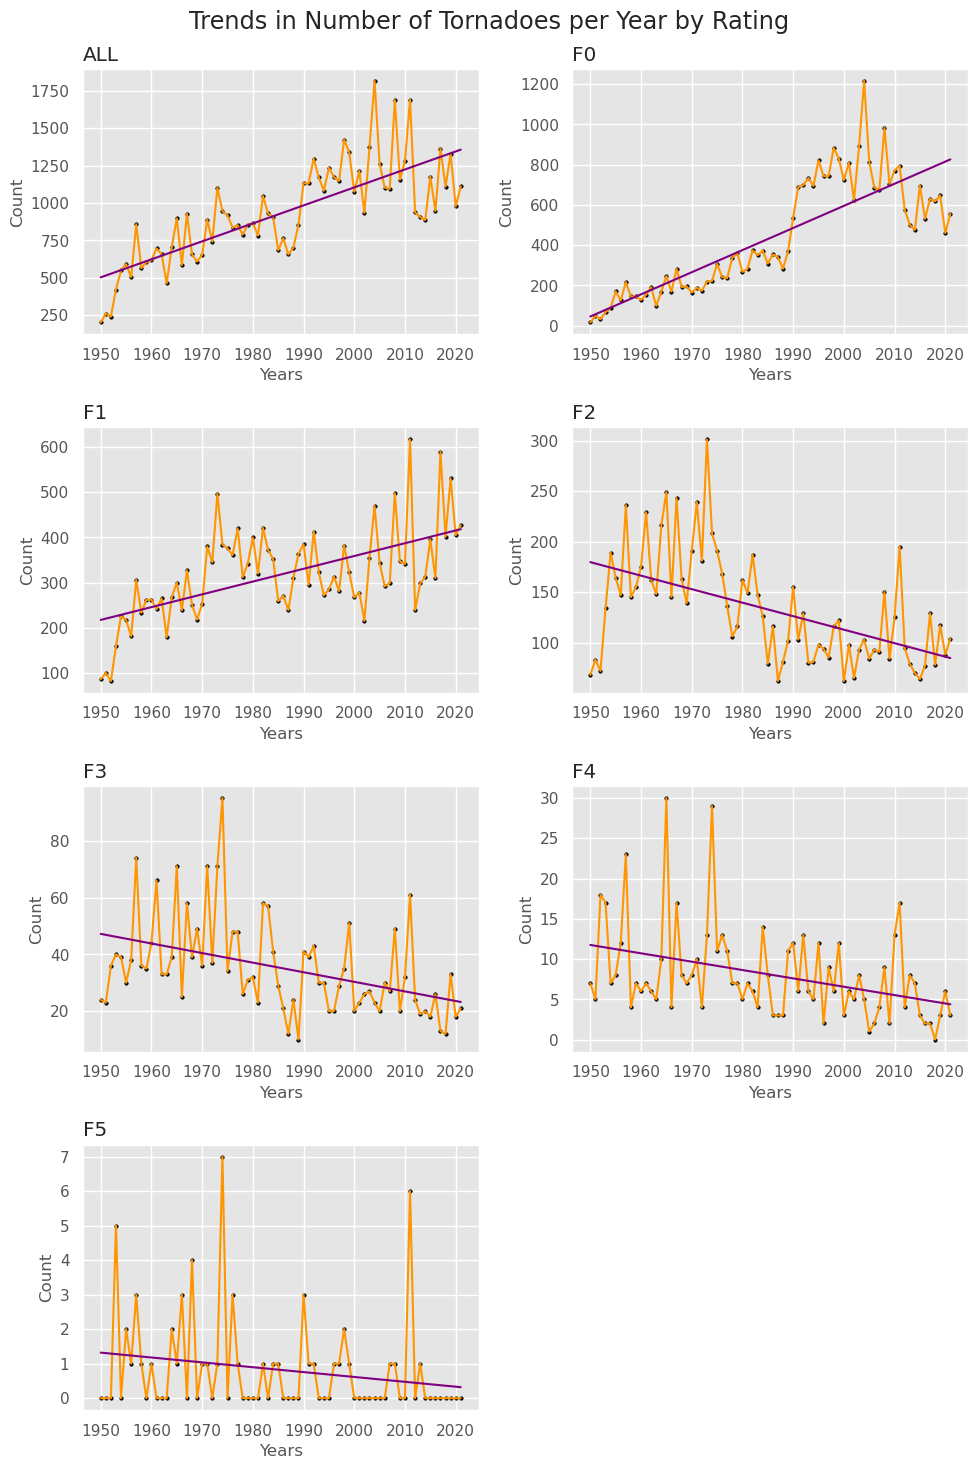

In [240]:
plt.style.use("ggplot")
fig,ax = plt.subplots(4,2,figsize=(10,15))

cols = df_counts.drop(columns="yr").columns

ii = 0
for i in range(0,4):
    for j in range(0,2):
        
        category = cols[ii]
        x = df_counts.yr
        y = df_counts[category]
        ax[i,j].plot(x,y,color="#FF9500")
        ax[i,j].scatter(x,y,color="#000000",s=6.0) # s is for markersize
        ax[i,j].set(xlabel="Years",ylabel="Count")
        ax[i,j].set_title(category.upper(),loc="left")
        
        # Draw regression line
        slope,intercept = np.polyfit(x,y,1)
        ax[i,j].plot(x,slope*x+intercept,color="purple")
        
        ii+=1
        if ii >= 7:
            break
            
ax[3,1].axis("off") # Blank out the last, unsed, plot position
fig.suptitle("Trends in Number of Tornadoes per Year by Rating",fontsize="xx-large")
fig.tight_layout(pad=1.5)

plt.show()